# Storytelling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/spi_matches.csv', parse_dates=[0])

# Here we drop the future data which are the games which are missing data because they have not occured yet
df = df.dropna()

# Using a random portion of the data for quicker model building in development
df = df.sample(frac=1)

df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
23806,2019-08-24,1854,Italy Serie A,Fiorentina,Napoli,65.66,82.48,0.2336,0.5241,0.2424,...,34.6,56.0,3.0,4.0,2.03,1.93,1.23,1.61,3.15,4.20
7620,2018-02-04,1846,German 2. Bundesliga,SV Darmstadt 98,MSV Duisburg,41.50,40.41,0.4359,0.2897,0.2745,...,19.4,10.6,1.0,2.0,1.93,1.65,1.48,1.39,1.05,2.10
23937,2019-08-25,2105,Brasileiro Série A,Ceará,Flamengo,47.33,68.78,0.2346,0.5266,0.2388,...,23.4,80.1,0.0,3.0,0.55,1.66,1.75,1.12,0.00,2.63
5458,2017-10-29,2105,Brasileiro Série A,Fluminense,Bahía,45.06,45.81,0.4811,0.2625,0.2564,...,17.3,17.3,1.0,1.0,0.61,1.12,0.81,0.53,0.84,1.05
1616,2017-03-31,1951,Major League Soccer,Toronto FC,Sporting Kansas City,44.57,32.82,0.5441,0.2025,0.2534,...,14.8,16.6,0.0,0.0,0.65,0.70,1.19,0.57,0.00,0.00


Here we can see some of the columns given with our data. We are given a lot of statistical features on each game. Let's try to come up with some compelling visualizations for them.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13521 entries, 23806 to 15558
Data columns (total 22 columns):
date           13521 non-null datetime64[ns]
league_id      13521 non-null int64
league         13521 non-null object
team1          13521 non-null object
team2          13521 non-null object
spi1           13521 non-null float64
spi2           13521 non-null float64
prob1          13521 non-null float64
prob2          13521 non-null float64
probtie        13521 non-null float64
proj_score1    13521 non-null float64
proj_score2    13521 non-null float64
importance1    13521 non-null float64
importance2    13521 non-null float64
score1         13521 non-null float64
score2         13521 non-null float64
xg1            13521 non-null float64
xg2            13521 non-null float64
nsxg1          13521 non-null float64
nsxg2          13521 non-null float64
adj_score1     13521 non-null float64
adj_score2     13521 non-null float64
dtypes: datetime64[ns](1), float64(17), int64(1),

Here we can see the type of each column. They are being parsed correctly so we do not have to do any type conversions. One point of feature engineering I am going to do is add a year column that is which year the game occured

In [4]:
df['year'] =  df.date.map(lambda s: s.year)
df.head(2)

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,year
23806,2019-08-24,1854,Italy Serie A,Fiorentina,Napoli,65.66,82.48,0.2336,0.5241,0.2424,...,56.0,3.0,4.0,2.03,1.93,1.23,1.61,3.15,4.2,2019
7620,2018-02-04,1846,German 2. Bundesliga,SV Darmstadt 98,MSV Duisburg,41.50,40.41,0.4359,0.2897,0.2745,...,10.6,1.0,2.0,1.93,1.65,1.48,1.39,1.05,2.1,2018


Let's look at how this data is distributed.

In [5]:
year_counts = df['year'].value_counts()
year_counts

2019    5099
2018    5060
2017    2592
2016     770
Name: year, dtype: int64

Because our data isn't normalized, let's downsample it so that the years are evenly distributed. This will help our plots not having one year dominate the scatterplots.

In [6]:
data_2019 = df.loc[df.year == 2019].sample(frac=(year_counts[2016]/year_counts[2019]))
data_2018 = df.loc[df.year == 2018].sample(frac=(year_counts[2016]/year_counts[2018]))
data_2017 = df.loc[df.year == 2017].sample(frac=(year_counts[2016]/year_counts[2017]))
data_2016 = df.loc[df.year == 2016].sample(frac=(year_counts[2016]/year_counts[2016]))
orig_df = df.copy()
df = pd.concat([data_2016,data_2017,data_2018,data_2019])
resampled_year_counts = df['year'].value_counts()
resampled_year_counts

2019    770
2017    770
2018    770
2016    770
Name: year, dtype: int64

This looks a lot more distributed

## First Visualization

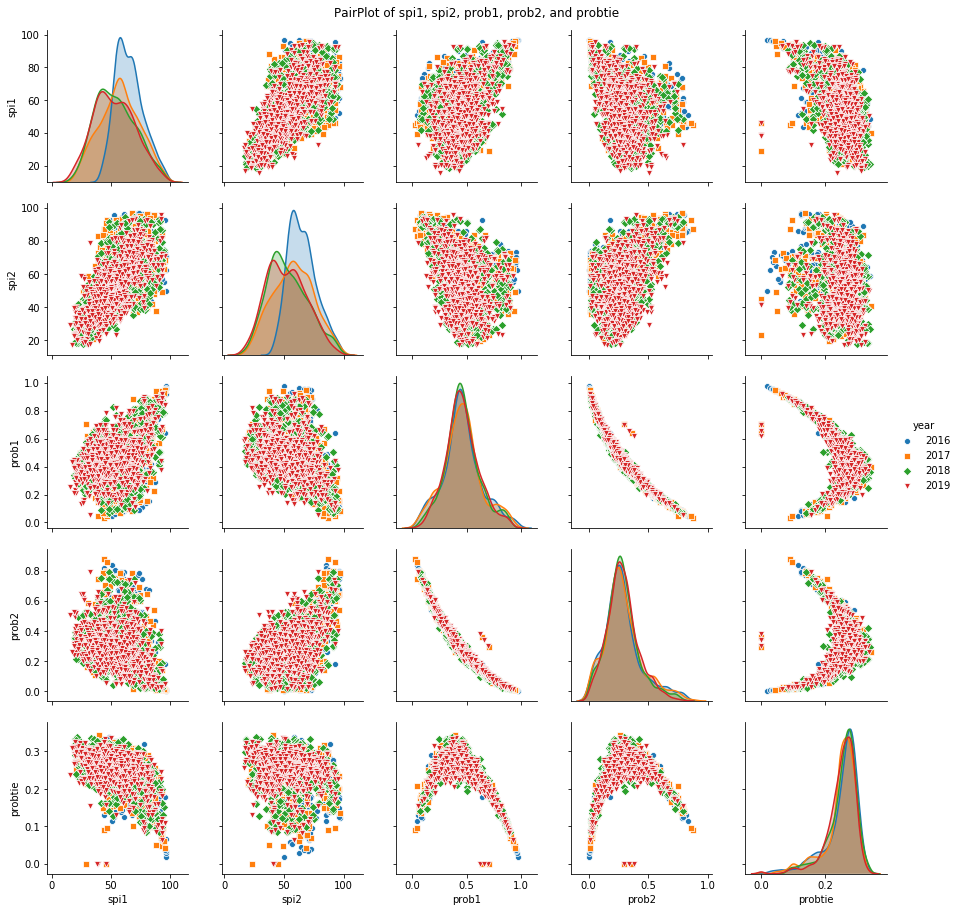

In [7]:
g = sns.pairplot(df, hue='year', vars=["spi1", "spi2", "prob1","prob2", 'probtie'], markers=["o", "s", "D", "v"])
g.fig.suptitle('PairPlot of spi1, spi2, prob1, prob2, and probtie', y=1.01)
plt.show()

Here we can see the pairplot of just 5 of the many features included in our file. This tells us a lot of information. First of all, looking at the diagonal plots, we can see the change in distribution of the statistics over time. We can tell that prob1, prob2, and probtie remain very consistent throughout the years, but we can see a decreasing trend in spi1 and spi2 over time. They is highest in 2016 and is lowest in 2019. The scatterplots tells us about the distribution between the variables. Here we can see pronounced figures relating prob1, prob2, and probtie. It makes sense that these features are highly correlated with one anoother but the shape they create is interesting which could give us key insights to the calculations that were used to create the data.

## Second Visualization

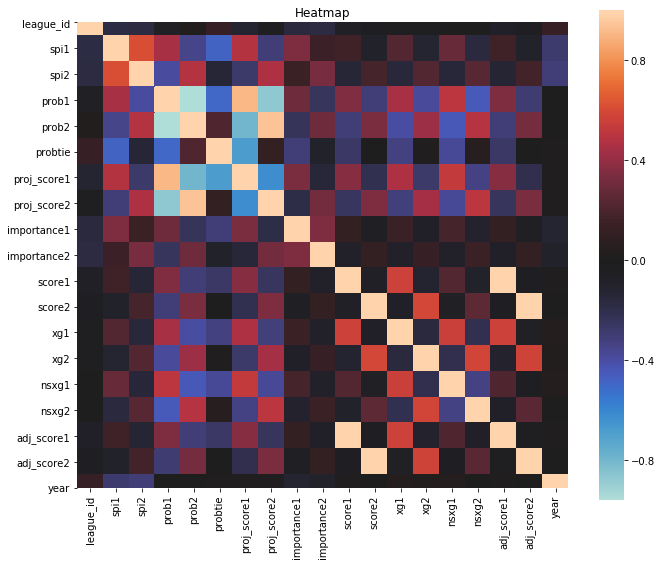

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), center=0,square=True)
ax.set_title('Heatmap')
plt.show()

Here is the heatmap of all the features. This heatmap tells us a lot about how the features are correlated. The laregest correlations are with features like score1 and score2, prob1 and prob2, and other features that are intrisically tightly coupled. 

In [9]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

orig_df['Date (f)'] = orig_df.date.apply(toYearFraction)
orig_df.head(3)


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,year,Date (f)
23806,2019-08-24,1854,Italy Serie A,Fiorentina,Napoli,65.66,82.48,0.2336,0.5241,0.2424,...,3.0,4.0,2.03,1.93,1.23,1.61,3.15,4.20,2019,2019.643721
7620,2018-02-04,1846,German 2. Bundesliga,SV Darmstadt 98,MSV Duisburg,41.50,40.41,0.4359,0.2897,0.2745,...,1.0,2.0,1.93,1.65,1.48,1.39,1.05,2.10,2018,2018.093151
23937,2019-08-25,2105,Brasileiro Série A,Ceará,Flamengo,47.33,68.78,0.2346,0.5266,0.2388,...,0.0,3.0,0.55,1.66,1.75,1.12,0.00,2.63,2019,2019.646461


In [10]:
orig_df['team1'].value_counts()

Arsenal              79
Liverpool            78
Chelsea              76
Tottenham Hotspur    76
Marseille            75
                     ..
Skenderbeu Korce      2
SV Zulte Waregem      2
Rijeka                2
Konyaspor             2
KAA Gent              2
Name: team1, Length: 415, dtype: int64

## Third Visualization

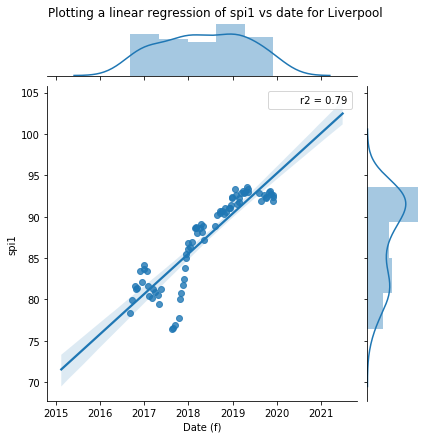

In [11]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
mydata = orig_df.loc[orig_df['team1'] == 'Liverpool']
g = sns.jointplot(x="Date (f)", y="spi1", data=mydata, order=1,  kind="reg", stat_func=r2);
g.fig.suptitle('Plotting a linear regression of spi1 vs date for Liverpool', y=1.01)
plt.show()

Here I show how we can visualize a regression of two variables. Here we have taken Liverpool, a well regarded soccer  (football) team and have looked at all their games where they have been home. Here we see how we can visualize the distribution of the data as well as the regression and r2 score all in one plot that is easy to read. We can see from the distribution aboce the graph that the number of games liverpoool has played each year remains roughly the same, however, they have had an increasing trend of their spi over time. 

Overall, I leaned a lot about seaborn's visualization library. They over an easy to implement and beautiful interface for matplotlib's visualization functions.